# Interface 2017.8

## EXOR回路テスト

### トレーニング実行＆モデルデータ生成

In [1]:
%run -i exor.py

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
100         0.636751    0.636264              0.5275         0.53                      32.0938       
200         0.595169    0.594845              0.75           0.75                      62.8538       
300         0.568167    0.567923              0.75           0.75                      93.8071       
400         0.545916    0.545717              0.75           0.75                      124.481       
500         0.528373    0.528222              0.75           0.75                      155.229       
600         0.515325    0.515214              0.75           0.75                      183.726       
700         0.505906    0.505828              0.75           0.75                      213.065       
800         0.499178    0.499122              0.75           0.75                      243.447       
900         0.494394    0.494354              0.75           0.75                   

### ネットワーク構造及び正当率/誤差グラフ表示

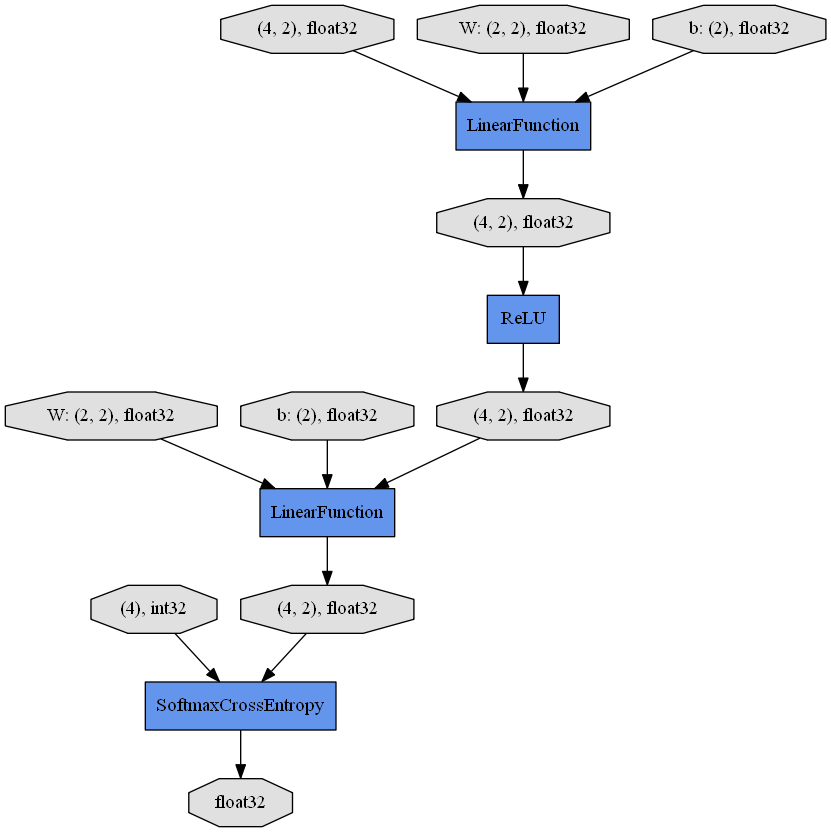

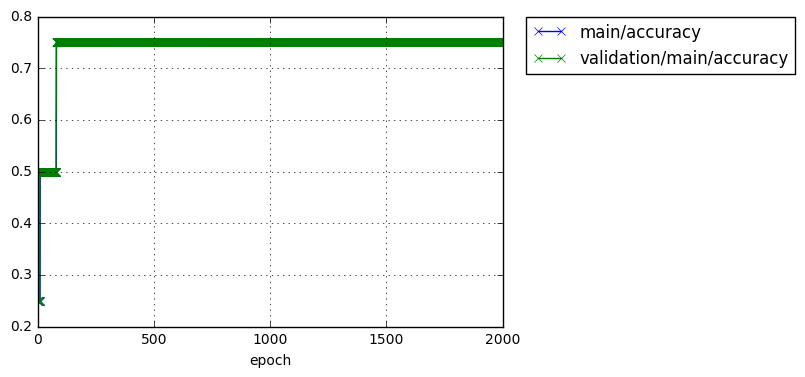

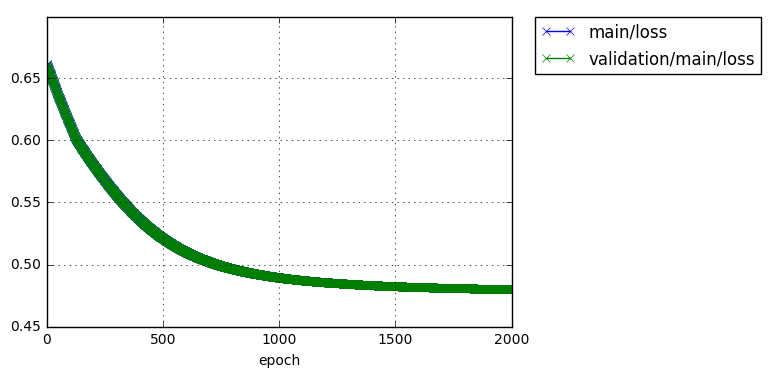

In [2]:
!dot -Tpng result/exor/cg.dot -o result/exor/cg.png

from IPython.display import Image
from IPython.display import display

display(Image(filename='result/exor/cg.png'))
display(Image(filename='result/exor/accuracy.png'))
display(Image(filename='result/exor/loss.png'))

### モデルデータからのテスト

In [3]:
import chainer
import chainer.functions as F
import chainer.links as L

In [4]:
class LogicCircuit(chainer.Chain):
    """ニューラルネットワークの構造"""

    def __init__(self):
        iniw = I.Normal(scale=1.0)  # モデルパラメータの初期化（平均0，分散1の分布に従う）
        super(LogicCircuit, self).__init__()
        with self.init_scope():
            self.lin1 = L.Linear(None, 2, initialW=iniw, initial_bias=0.5)
            self.lin2 = L.Linear(None, 2, initialW=iniw, initial_bias=0.5)

    def __call__(self, x):
        h1 = F.relu(self.lin1(x))
        y = self.lin2(h1)
        return y

In [5]:
# GPU使用設定
gpu_device = 0
chainer.cuda.get_device(gpu_device).use()
xp = chainer.cuda.cupy

In [6]:
# ニューラルネットワークの登録
model = L.Classifier(LogicCircuit(), lossfun=F.softmax_cross_entropy)
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)
model.to_gpu(gpu_device)

In [7]:
# モデルデータ読み込み
chainer.serializers.load_npz("result/exor/exor.model", model)

In [8]:
test = xp.array(([0,0], [0,1], [1,0], [1,1], [0.2,0], [0.9,0.8]), dtype=xp.float32)

# テスト
for i in range(test.shape[0]):
    x = chainer.Variable(test[i].reshape(1, 2))
    result = F.softmax(model.predictor(x))
    print("input: {}, result: {}".format(test[i], result.data.argmax()))

input: [ 0.  0.], result: 0
input: [ 0.  1.], result: 1
input: [ 1.  0.], result: 1
input: [ 1.  1.], result: 1
input: [ 0.2  0. ], result: 0
input: [ 0.89999998  0.80000001], result: 1
